# DS 3000 Project: School Shootings
## Group Members: Evelyn Lu, Zonghao Han, Lam Truong,  Jalen Wu


In [153]:
# To import the necessary libraries for our project.
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [154]:
# To load the dataframe
school_shooting_df = pd.read_csv('Public v3.1 K-12 School Shooting Database 10 16 2022.csv')
school_shooting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Incident_ID           2159 non-null   object 
 1   Month                 2159 non-null   int64  
 2   Day                   2159 non-null   int64  
 3   Year                  2159 non-null   int64  
 4   Date                  2159 non-null   object 
 5   School                2159 non-null   object 
 6   Victims_Killed        2159 non-null   int64  
 7   Victims_Wounded       2159 non-null   int64  
 8   Number_Victims        2159 non-null   int64  
 9   Shooter_Killed        2159 non-null   int64  
 10  Source                2159 non-null   object 
 11  Number_News           786 non-null    float64
 12  Media_Attention       833 non-null    object 
 13  Reliability           2159 non-null   int64  
 14  Quarter               2148 non-null   object 
 15  City                 

In [155]:
print('There are {} rows and {} columns.'.format(school_shooting_df.shape[0], school_shooting_df.shape[1]))

There are 2159 rows and 37 columns.


In [156]:
# To extract only the columns that are relevant to us.
# victim killed, victim wounder, number victim, Date, shooter_killed, City, State, School_level, Situation. 
school_shooting_df = school_shooting_df.loc[:,['Victims_Killed', 'Victims_Wounded', 'Number_Victims', 'Date', 'Shooter_Killed',
                         'City', 'State', 'School_Level']]
school_shooting_df.head()

,Victims_Killed,Victims_Wounded,Number_Victims,Date,Shooter_Killed,City,State,School_Level
0,0,0,0,10/14/2022,0,Abbeville,LA,Middle
1,0,1,1,10/14/2022,0,Greensboro,NC,High
2,1,1,2,10/14/2022,0,Richmond,VA,Elementary
3,0,0,0,10/14/2022,1,Bogalusa,LA,High
4,0,0,0,10/14/2022,0,Murfreesboro,TN,High


In [157]:
# To verify that the columns were selected and that the data was mutated.
school_shooting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Victims_Killed   2159 non-null   int64 
 1   Victims_Wounded  2159 non-null   int64 
 2   Number_Victims   2159 non-null   int64 
 3   Date             2159 non-null   object
 4   Shooter_Killed   2159 non-null   int64 
 5   City             2159 non-null   object
 6   State            2159 non-null   object
 7   School_Level     2135 non-null   object
dtypes: int64(4), object(4)
memory usage: 135.1+ KB


In [158]:
#find all the null value
school_shooting_df.isnull().sum()

Victims_Killed      0
Victims_Wounded     0
Number_Victims      0
Date                0
Shooter_Killed      0
City                0
State               0
School_Level       24
dtype: int64

In [159]:
# To drop the NaN values that are present in our dataframe.
school_shooting_df = school_shooting_df.dropna(subset = ['School_Level'])
school_shooting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 0 to 2158
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Victims_Killed   2135 non-null   int64 
 1   Victims_Wounded  2135 non-null   int64 
 2   Number_Victims   2135 non-null   int64 
 3   Date             2135 non-null   object
 4   Shooter_Killed   2135 non-null   int64 
 5   City             2135 non-null   object
 6   State            2135 non-null   object
 7   School_Level     2135 non-null   object
dtypes: int64(4), object(4)
memory usage: 150.1+ KB


Some of the column are not in suitable types. Thus, we are changing the type of column city to String, State to String, School_Level to String and Date to datetime. 

In [160]:
# To modify the Data types for each column in a way to more accurately represent our data.
school_shooting_df['City'] = school_shooting_df['City'].astype('string')
school_shooting_df['State'] = school_shooting_df['State'].astype('string')
school_shooting_df['School_Level'] = school_shooting_df['School_Level'].astype('string')
# school_shooting_df['Situation'] = school_shooting_df['Situation'].astype('string')
school_shooting_df['Date']= pd.to_datetime(school_shooting_df['Date'])

In [161]:
# To verify that the Dtypes were mutated.
school_shooting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 0 to 2158
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Victims_Killed   2135 non-null   int64         
 1   Victims_Wounded  2135 non-null   int64         
 2   Number_Victims   2135 non-null   int64         
 3   Date             2135 non-null   datetime64[ns]
 4   Shooter_Killed   2135 non-null   int64         
 5   City             2135 non-null   string        
 6   State            2135 non-null   string        
 7   School_Level     2135 non-null   string        
dtypes: datetime64[ns](1), int64(4), string(3)
memory usage: 150.1 KB


Since there are so many value for State column and City columnm, we decided to put index for the encode purpose, just like when we do with the index column when we working the BMI data. 

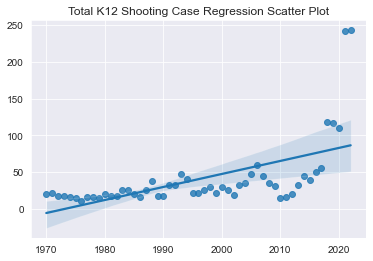

In [162]:
#calculate the numbers of cases in each year
total_case_by_yr = []
year = []

for n in range(1970, 2023):
    year.append(n)
    shoot_yr = school_shooting_df[school_shooting_df['Date'].dt.year == n]
    num_total_in_yr = len(shoot_yr.index)
    total_case_by_yr.append(num_total_in_yr)

#plot the regression model
total_case_scatter = sns.regplot(x = year, y = total_case_by_yr).set(title='Total K12 Shooting Case Regression Scatter Plot')

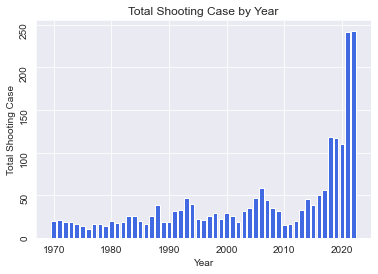

In [163]:
#plot the bar chart for to see the tendency
plt.bar(year, total_case_by_yr, color = 'royalblue')
plt.yticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Total Shooting Case")
plt.title("Total Shooting Case by Year")
plt.show()

In [164]:
#Change the vale of State to index
le = preprocessing.LabelEncoder()
le.fit(school_shooting_df['State'])
list(le.classes_)
le.transform(school_shooting_df['State'])

array([18, 27, 45, ...,  7,  7,  7])

In [165]:
school_shooting_df['State'] = le.transform(school_shooting_df['State'])

In [166]:
#Change the vale of City to index
lee = preprocessing.LabelEncoder()
lee.fit(school_shooting_df['City'])
list(lee.classes_)
lee.transform(school_shooting_df['City'])

array([  0, 326, 719, ..., 898, 898, 898])

In [167]:
school_shooting_df['City'] = lee.transform(school_shooting_df['City'])

If you want to get the State using number of index, you can use this function to find. For example, I am doing index 18

In [168]:
le.inverse_transform([18])

array(['LA'], dtype=object)

In [169]:
shooting_df = pd.DataFrame()

In [170]:
#encode the categorical feature
School_Level = school_shooting_df.School_Level
pd.get_dummies(School_Level)

school_shooting_df = pd.get_dummies(school_shooting_df, columns =['School_Level'])
school_shooting_df.head()

,Victims_Killed,Victims_Wounded,Number_Victims,Date,Shooter_Killed,City,State,School_Level_12-Jun,School_Level_Elementary,School_Level_High,School_Level_Junior High,School_Level_K-12,School_Level_K-8,School_Level_Middle,School_Level_Other,School_Level_Unknown
0,0,0,0,2022-10-14,0,0,18,0,0,0,0,0,0,1,0,0
1,0,1,1,2022-10-14,0,326,27,0,0,1,0,0,0,0,0,0
2,1,1,2,2022-10-14,0,719,45,0,1,0,0,0,0,0,0,0
3,0,0,0,2022-10-14,1,91,18,0,0,1,0,0,0,0,0,0
4,0,0,0,2022-10-14,0,561,42,0,0,1,0,0,0,0,0,0


In [171]:
# calculating the coefficient of the input and tip_amout
corr_df = school_shooting_df.corr()
print(corr_df['State'])

Victims_Killed             -0.024987
Victims_Wounded            -0.017790
Number_Victims             -0.024549
Shooter_Killed              0.024377
City                       -0.024608
State                       1.000000
School_Level_12-Jun        -0.020854
School_Level_Elementary     0.000973
School_Level_High           0.001791
School_Level_Junior High    0.012493
School_Level_K-12          -0.008367
School_Level_K-8            0.012351
School_Level_Middle         0.005503
School_Level_Other         -0.010352
School_Level_Unknown       -0.049389
Name: State, dtype: float64


In [172]:
#partition the data
X   = school_shooting_df[['City','Victims_Killed','Victims_Wounded','Shooter_Killed','School_Level_Unknown']] #get the input features
y   = school_shooting_df['State']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                                 #preserve the distribution of the labels
                                                   )

Since our target will fall into. classifier type, in phase 3, we have decided to do RandomForestClassifier, DecisionTreeClassifier, and KNeighborsClassifier. 

## RandomForestClassifier

In [173]:
#build the classifier
rf = RandomForestClassifier(criterion='entropy', n_estimators = 200, random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=7)

In [174]:
#predict the labels for the test set
y_pred   = rf.predict(X_test)
#y_pred

In [175]:
# Prediction accuracy
print('The accuracy of the model is: {}'.format(rf.score(X_test, y_test)))

The accuracy of the model is: 0.41029641185647425


In [176]:
for n in range(20,300,50):
    rf = RandomForestClassifier(criterion='entropy', n_estimators = n, random_state = 7)
    rf.fit(X_train, y_train)
    y_pred   = rf.predict(X_test)
    
    msee = rf.score(X_test, y_test)
    print('The accuracy will be', round(msee,2), 'when n_estimators equal to', n )

The accuracy will be 0.41 when n_estimators equal to 20
The accuracy will be 0.41 when n_estimators equal to 70
The accuracy will be 0.41 when n_estimators equal to 120
The accuracy will be 0.41 when n_estimators equal to 170
The accuracy will be 0.41 when n_estimators equal to 220
The accuracy will be 0.41 when n_estimators equal to 270


After trying different number of n_estimators, we found that the highest accuracy we could get is 0.41.

## DecisionTreeClassifier

In [177]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=120)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=120)

In [178]:
#predict the labels for the test set
y_pred   = dt.predict(X_test)

print('The predicted State is: {}'.format(y_pred))

The predicted State is: [43 43 43  4 37 11 38 43  7 38  6 39 22  4 35  4 38 43 10  4 24 20  7 20
  4  4 45 35 17 43  4 12 20 10 35 38  4 22 18 27 34  4  4 20 42  6 12  9
 43  1 37 14 27  9 15 35 49 10 38  7 32 45 35 34  5 43  2 35 43 10 42 43
 43  4 20  4  9 43  9 48 14 22 35  4  5  1  7 20 37 27 32 31  4 16 43  1
 40 49 14 24  2 15 34 38 38 43  1 45  3  4  2 22  4  8 24 34 27 18 38  1
 17 43 12 24 48 22  5 49 43 27 27  4 48  4 10 45 43 49 24 18  4  2 43 43
 40 14 24 49 42 10 32  4 32 43  9 10  2 43 14 42 37  4 14 35  5  4 31 34
  2 10 28 43 43 42 36  4 14  7 14 10 43 27 15 18  7 35 48 14 26 37 24 27
 20  1  9 44 16 36 38  4 18 31 26  1 26 43  4 29  1 11 44 24 48 43 18  1
  2 14 18 27 36 15 14 43 43 38  6 35 38 11 32 42 14 27 34 47 43 14 38  4
  9 42 38 18 27  7 43 14 34 44  1 12  9 38 43 10  4 38  1 22  4 22 43 48
  5 38 14 31  4  8 16 20 48 36 35 22 35 10  9  4  4 38  4 36 43 42  9  9
  4 14 43 25 43 43 49  4 22 35 10 34 23 38 35  5 23 48  6 12  6 24 19 22
 48 16 42 28 29 45  2 45  9

In [179]:
# Prediction accuracy
print('The accuracy of the model is: {}'.format(dt.score(X_test, y_test)))

The accuracy of the model is: 0.5663026521060842


In [180]:
for n in range(100,200,20):
    dt = DecisionTreeClassifier(criterion='entropy', random_state=n)
    dt.fit(X_train, y_train)
    y_pred   = dt.predict(X_test)
    
    msee = dt.score(X_test, y_test)
    print('The accuracy will be', round(msee,2), 'when n_estimators equal to', n )

The accuracy will be 0.56 when n_estimators equal to 100
The accuracy will be 0.57 when n_estimators equal to 120
The accuracy will be 0.56 when n_estimators equal to 140
The accuracy will be 0.57 when n_estimators equal to 160
The accuracy will be 0.56 when n_estimators equal to 180


After trying different number of random_state, we found that the highest accuracy we could get is 0.57.

## KNeighborsClassifier

In [181]:
knc = KNeighborsClassifier(n_neighbors = 4) #initialize the classifier and set the number of neighbors
knc.fit(X_train, y_train)

#predict for the test set
y_pred = knc.predict(X_test)
print('The y_pred of the model is:', y_pred)

#prediction accuracy
print('The accuracy of the model is: {}'.format(knc.score(X_test, y_test)))

The y_pred of the model is: [43 43 15  4 19  4 38 43  7 38 37 44 22  4  4  4  6 43 10  4 24 20  7 20
  4 27 45 35 17 43  4 35 20 10 35 38  4  1 24 27  4  4  4 20 42  7 35  4
  4 18 37  3 27 38 15 35 49 10 27  7 32 45 35 45  2 43  3 14 43 10 42 43
 16  4 20  4  9 43  9 48 14 22 27  4  5  1  7 20 36 27 32 34  4 16 43  1
  7  9 14 24  9 15 34 38  2 43  1  4  3  4  2  4  4  8 24 48 27 18 38  1
  4 37 45  4  4 22  5 10 43 27 27  4 48 45 10 34 43 10 24 18  4  2 43 43
 40 14  1  9 42 10 43  4  4 43  9 10  2 43 20  4 37  4 14 35  1  4  4 27
  3  4 10  9 35 42 36  4 14  7 14 40  4 15 15 18  7 35 43 14  1 37 24 27
 20  1  2 14 24  4 38 10 15  9  1  1  1  4  4 29  4 43 44 24 40 43 18  1
  3  4 18 17  4 40  1  0 43 38  6 35 24  4 43 42 14 19 34 15 42 14 38  4
  9 42 38 18 10  7 43 14 34 44  1  5  9 38 43 10  4 38  1 18 27 22 14 48
 44 38  4 45  4  8 24 22 48 31 35 22 35 38  1 18  4 38 27  4 43 42  9  9
  4 14  2  5 43 43 49  4 22  4 10 34 23 14 35 40  4 48  6 12  6 24  1 22
 33 16  4 10 29 45 18  

In [182]:
#identify a suitable value of k
predictions = {}

for k in range(3, 60, 2): #increment k by 2
    knn = KNeighborsClassifier(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test).round(4)
    
# Prediction accuracy    
print(predictions)

{3: 0.5117, 5: 0.5148, 7: 0.4914, 9: 0.4649, 11: 0.4493, 13: 0.4337, 15: 0.429, 17: 0.415, 19: 0.4087, 21: 0.3963, 23: 0.3963, 25: 0.4009, 27: 0.3947, 29: 0.3931, 31: 0.3869, 33: 0.3713, 35: 0.3666, 37: 0.3463, 39: 0.3448, 41: 0.3479, 43: 0.3401, 45: 0.3339, 47: 0.3339, 49: 0.3276, 51: 0.3245, 53: 0.3245, 55: 0.3214, 57: 0.3214, 59: 0.3073}


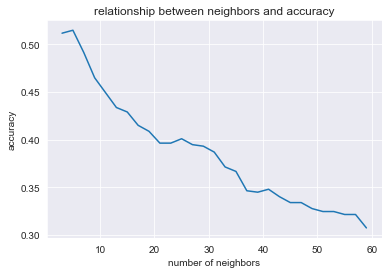

In [183]:
#plot the lineplot with k values
sns.lineplot(x = predictions.keys(), y = predictions.values()).set(xlabel ='number of neighbors', ylabel = 'accuracy', title ='relationship between neighbors and accuracy')
plt.show()


Based on the graph, we found that the highest accuracy we could get is 0.53.